# Problem set 2: linear regression practice

Lucas Emanuel Resck Domingues
Professor: Rodrigo Targino

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#3.7---Exercises" data-toc-modified-id="3.7---Exercises-1">3.7 - Exercises</a></span><ul class="toc-item"><li><span><a href="#Problem-8" data-toc-modified-id="Problem-8-1.1">Problem 8</a></span></li><li><span><a href="#Problem-9" data-toc-modified-id="Problem-9-1.2">Problem 9</a></span></li><li><span><a href="#Problem-13" data-toc-modified-id="Problem-13-1.3">Problem 13</a></span></li></ul></li><li><span><a href="#Section-4.7" data-toc-modified-id="Section-4.7-2">Section 4.7</a></span><ul class="toc-item"><li><span><a href="#Problem-10" data-toc-modified-id="Problem-10-2.1">Problem 10</a></span></li><li><span><a href="#Problem-11" data-toc-modified-id="Problem-11-2.2">Problem 11</a></span></li></ul></li><li><span><a href="#Reference" data-toc-modified-id="Reference-3">Reference</a></span></li></ul></div>

## 3.7 - Exercises

### Problem 8

This question involves the use of simple linear regression on the Auto
data set.

**(a)** Use the `lm()` function to perform a simple linear regression with
`mpg` as the response and `horsepower` as the predictor.
Use the `summary()` function to print the results.
Comment on the output.
For example:

**(i)** Is there a relationship between the predictor and the response?

**(ii)** How strong is the relationship between the predictor and
the response?

**(iii)** Is the relationship between the predictor and the response
positive or negative?

**(iv)** What is the predicted mpg associated with a horsepower of
98? What are the associated 95% confidence and prediction
intervals?

In [1]:
library(ISLR)
Auto = ISLR::Auto
lm.fit = lm(mpg ~ horsepower, Auto)
summary(lm.fit)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


There is a relationship between `horsepower` and `mpg`, because `horsepower`'s coefficient is statistically significant.
The relationship is negative: for each `horsepower` unity increased, `mpg` is expected to decrease 0.15 unity.

We can see the `mpg` prediction for `horsepower` 98 and the associated intervals:

In [2]:
predict(lm.fit, data.frame(horsepower = c(98)), interval = "prediction")
predict(lm.fit, data.frame(horsepower = c(98)), interval = "confidence")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


,fit,lwr,upr
1,24.46708,23.97308,24.96108


**(b)** Plot the response and the predictor.
Use the `abline()` function to display the least squares regression line.

**Solution:** We see the fitted least squares regression line:

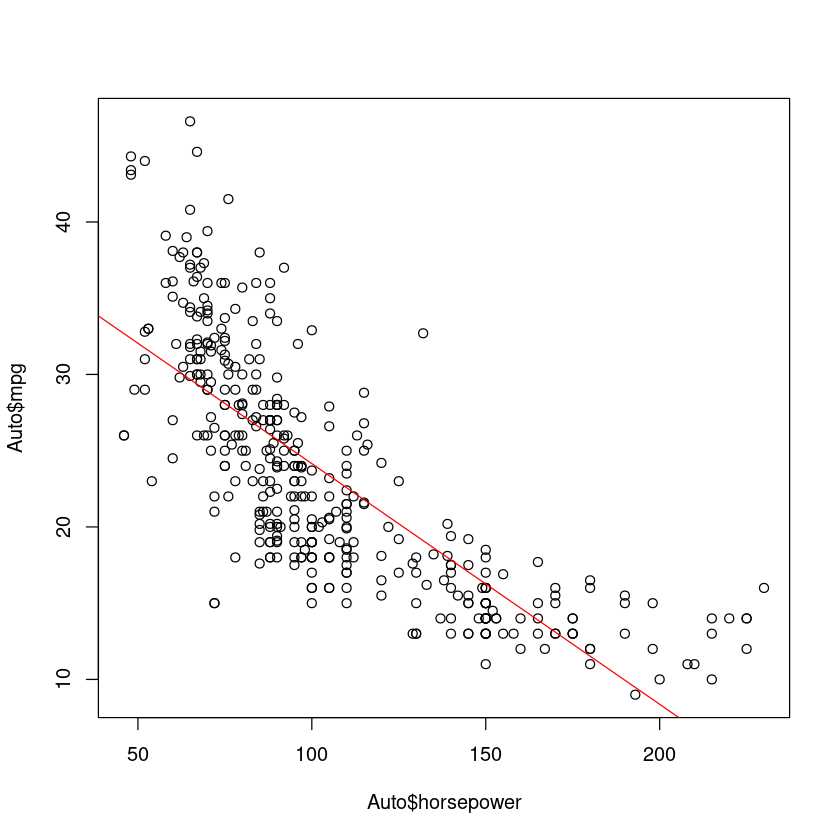

In [3]:
plot(Auto$horsepower, Auto$mpg)
abline(lm.fit, col = "red")

**(c)** Use the `plot()` function to produce diagnostic plots of the least
squares regression fit.
Comment on any problems you see with the fit.

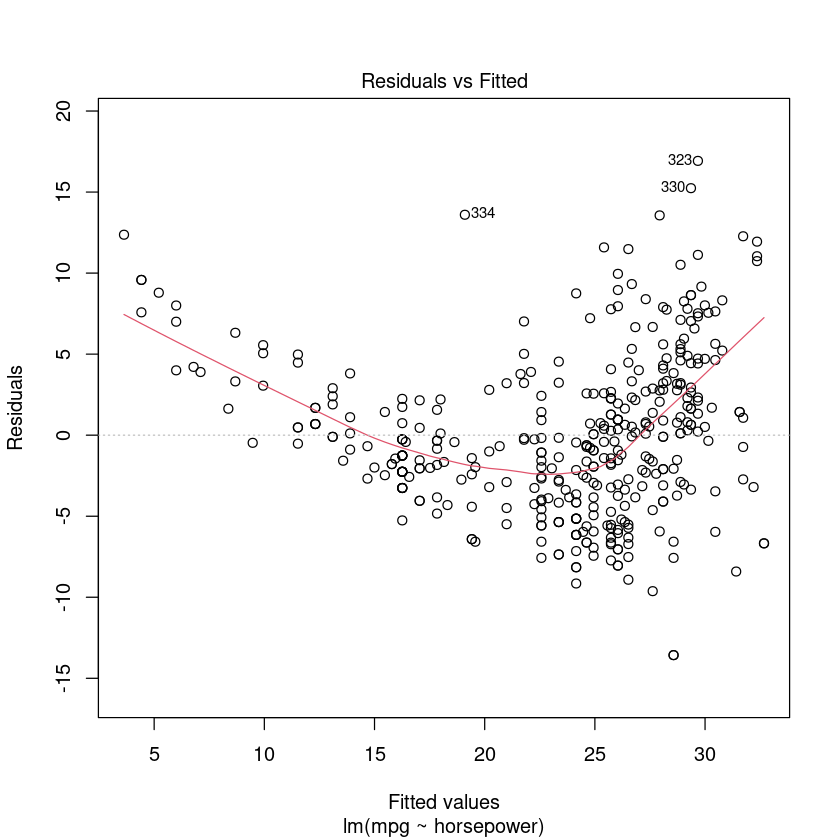

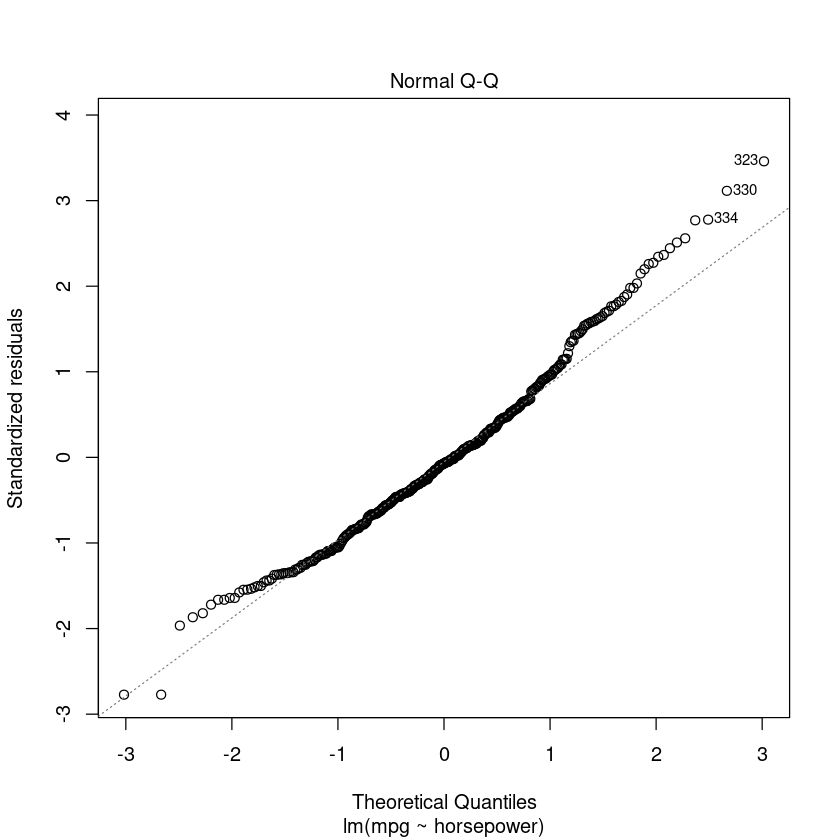

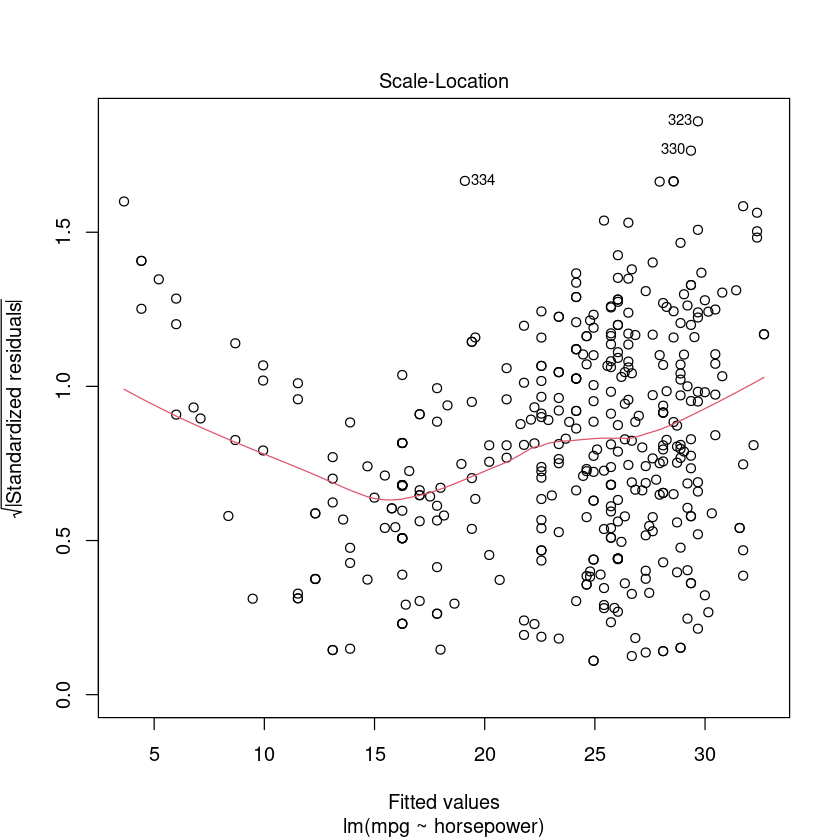

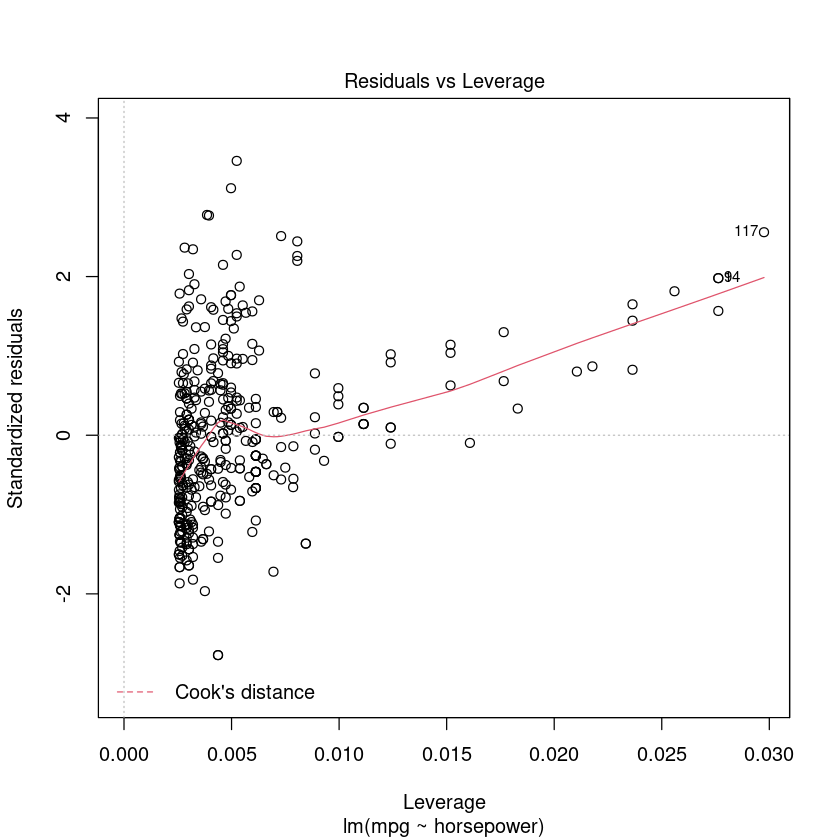

In [4]:
plot(lm.fit)

The error is bigger for small and large `horsepower` values. Small and large values do not follow a normal distribution. We should include polynomial terms in the linear regression or apply some transformation on the data, maybe $\log$ or $\sqrt{}$.

### Problem 9

This question involves the use of multiple linear regression on the
Auto data set.

**(a)** Produce a scatterplot matrix which includes all of the variables
in the data set.

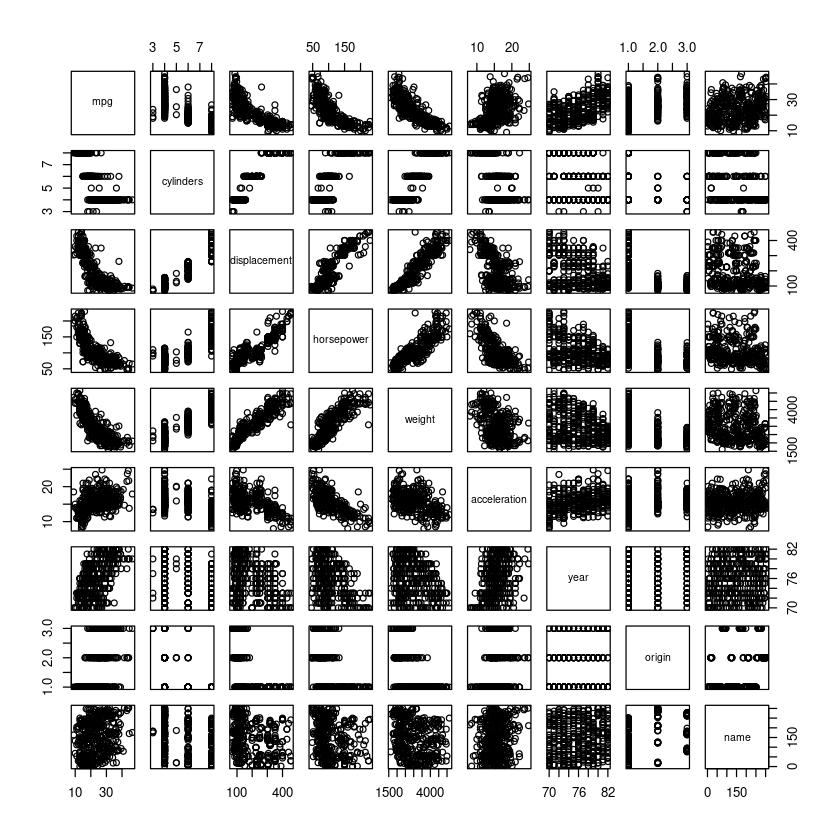

In [5]:
pairs(Auto)

**(b)** Compute the matrix of correlations between the variables using
the function `cor()`.
You will need to exclude the name variable, which is qualitative.

In [6]:
cor(Auto[1:8])

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


**(c)** Use the `lm()` function to perform a multiple linear regression
with `mpg` as the response and all other variables except name as
the predictors.
Use the `summary()` function to print the results.
Comment on the output.
For instance:

**i.** Is there a relationship between the predictors and the response?

**ii.** Which predictors appear to have a statistically significant
relationship to the response?

**iii.** What does the coefficient for the year variable suggest?

In [7]:
lm.fit = lm(mpg ~ ., Auto[1:8])
summary(lm.fit)


Call:
lm(formula = mpg ~ ., data = Auto[1:8])

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


The F test has small p-value, so we conclude that there is a relationship between the predictors and `mpg`.
`displacement`, `weight`, `year` and `origin` are variables with a statistically significant relationship with `mpg`.

The coefficient of `year` suggests that every year `mpg` increases 0.75. That is, the cars are becoming more efficient.

**(d)** Use the `plot()` function to produce diagnostic plots of the linear
regression fit.
Comment on any problems you see with the fit.
Do the residual plots suggest any unusually large outliers?
Does the leverage plot identify any observations with unusually high
leverage?

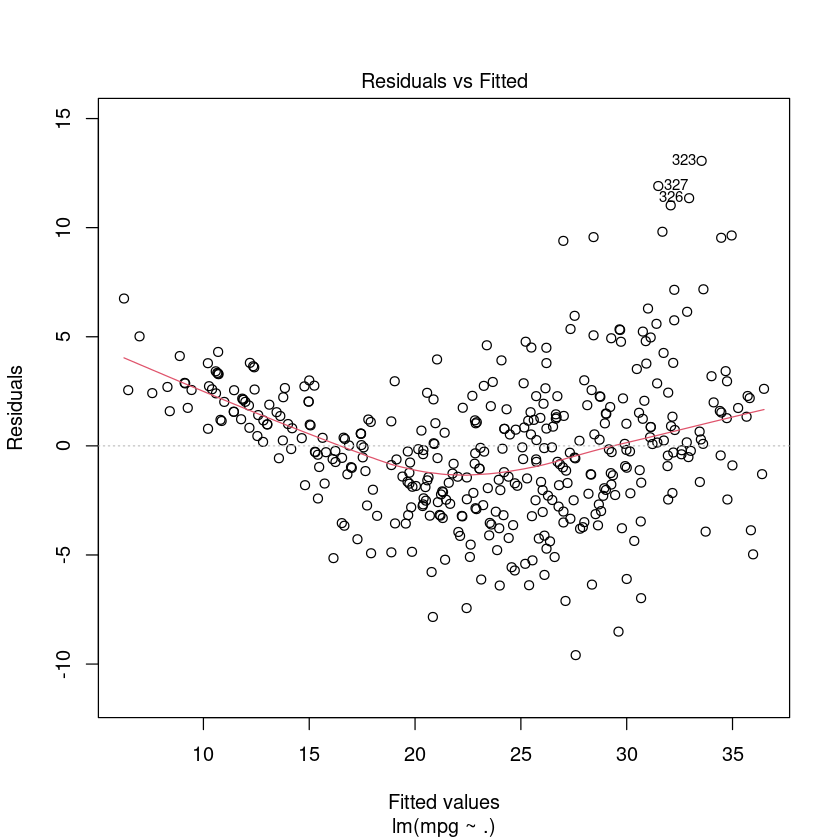

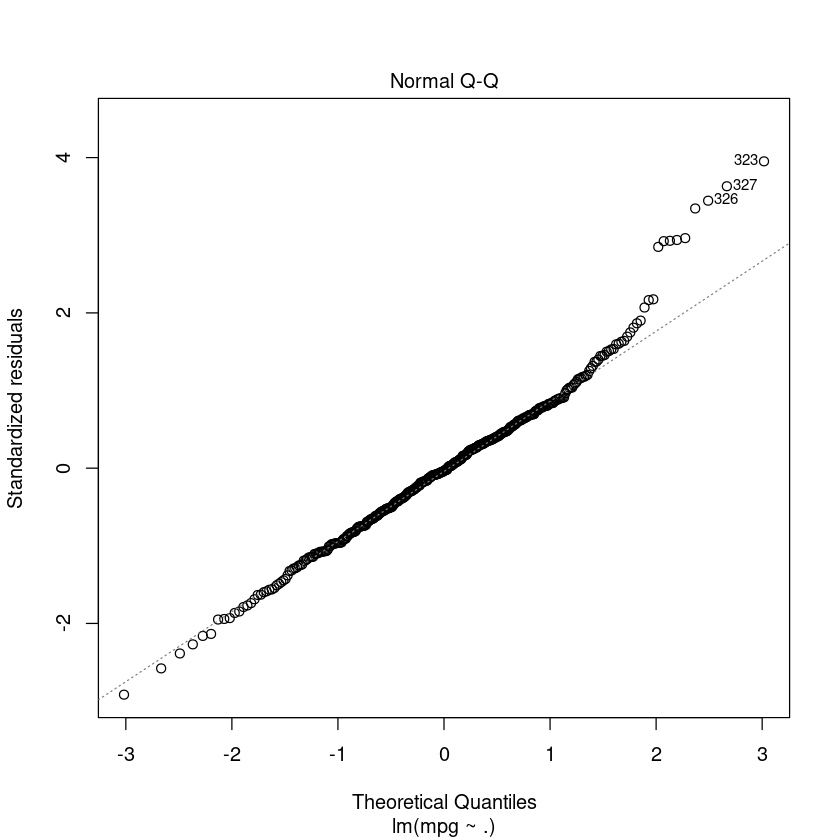

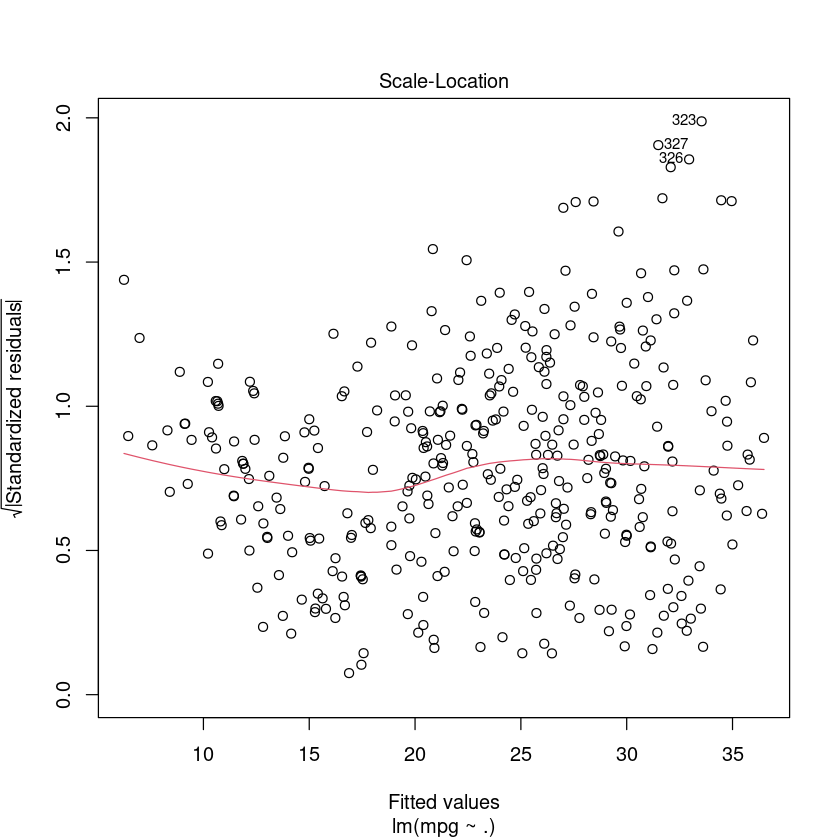

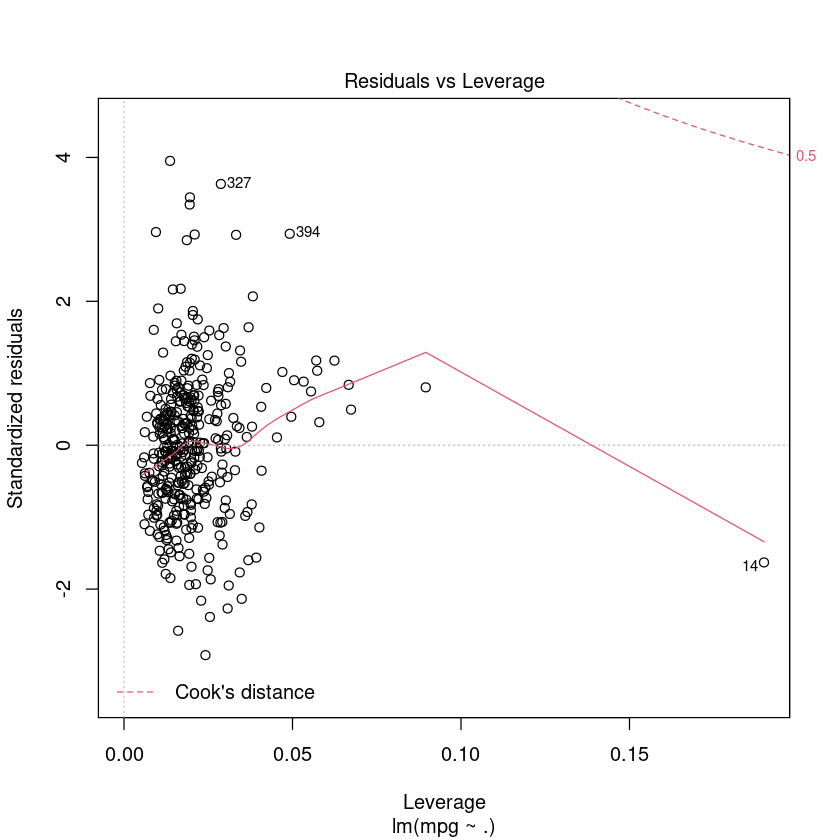

In [8]:
plot(lm.fit)

There are some unusual outliers for large fitted values.
We also see a point with a high leverage.

**(e)** Use the $*$ and $\colon$ symbols to fit linear regression models with
interaction effects.
Do any interactions appear to be statistically
significant?

**Solution:** We will fit a regression with all one vs. one interaction terms.

In [9]:
lm.fit = lm(mpg ~ .*., Auto[1:8])
summary(lm.fit)


Call:
lm(formula = mpg ~ . * ., data = Auto[1:8])

Residuals:
    Min      1Q  Median      3Q     Max 
-7.6303 -1.4481  0.0596  1.2739 11.1386 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)   
(Intercept)                3.548e+01  5.314e+01   0.668  0.50475   
cylinders                  6.989e+00  8.248e+00   0.847  0.39738   
displacement              -4.785e-01  1.894e-01  -2.527  0.01192 * 
horsepower                 5.034e-01  3.470e-01   1.451  0.14769   
weight                     4.133e-03  1.759e-02   0.235  0.81442   
acceleration              -5.859e+00  2.174e+00  -2.696  0.00735 **
year                       6.974e-01  6.097e-01   1.144  0.25340   
origin                    -2.090e+01  7.097e+00  -2.944  0.00345 **
cylinders:displacement    -3.383e-03  6.455e-03  -0.524  0.60051   
cylinders:horsepower       1.161e-02  2.420e-02   0.480  0.63157   
cylinders:weight           3.575e-04  8.955e-04   0.399  0.69000   
cylinders:acceleration  

The statistically significant interaction coefficients are ` displacement:year`, `acceleration:year`, and `acceleration:origin`, for $\text{p-value} < 0.05$.

**(f)** Try a few different transformations of the variables, such as $\log(X)$, $\sqrt{X}$, $X^2$.
Comment on your findings.

In [10]:
lm.fit = lm(log(mpg) ~ ., Auto[1:8])
summary(lm.fit)


Call:
lm(formula = log(mpg) ~ ., data = Auto[1:8])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40955 -0.06533  0.00079  0.06785  0.33925 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.751e+00  1.662e-01  10.533  < 2e-16 ***
cylinders    -2.795e-02  1.157e-02  -2.415  0.01619 *  
displacement  6.362e-04  2.690e-04   2.365  0.01852 *  
horsepower   -1.475e-03  4.935e-04  -2.989  0.00298 ** 
weight       -2.551e-04  2.334e-05 -10.931  < 2e-16 ***
acceleration -1.348e-03  3.538e-03  -0.381  0.70339    
year          2.958e-02  1.824e-03  16.211  < 2e-16 ***
origin        4.071e-02  9.955e-03   4.089 5.28e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1191 on 384 degrees of freedom
Multiple R-squared:  0.8795,	Adjusted R-squared:  0.8773 
F-statistic: 400.4 on 7 and 384 DF,  p-value: < 2.2e-16


In [11]:
lm.fit = lm(sqrt(mpg) ~ ., Auto[1:8])
summary(lm.fit)


Call:
lm(formula = sqrt(mpg) ~ ., data = Auto[1:8])

Residuals:
     Min       1Q   Median       3Q      Max 
-0.98891 -0.18946  0.00505  0.16947  1.02581 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.075e+00  4.290e-01   2.506   0.0126 *  
cylinders    -5.942e-02  2.986e-02  -1.990   0.0474 *  
displacement  1.752e-03  6.942e-04   2.524   0.0120 *  
horsepower   -2.512e-03  1.274e-03  -1.972   0.0493 *  
weight       -6.367e-04  6.024e-05 -10.570  < 2e-16 ***
acceleration  2.738e-03  9.131e-03   0.300   0.7644    
year          7.381e-02  4.709e-03  15.675  < 2e-16 ***
origin        1.217e-01  2.569e-02   4.735 3.09e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3074 on 384 degrees of freedom
Multiple R-squared:  0.8561,	Adjusted R-squared:  0.8535 
F-statistic: 326.3 on 7 and 384 DF,  p-value: < 2.2e-16


In [12]:
lm.fit = lm(I(mpg^2) ~ ., Auto[1:8])
summary(lm.fit)


Call:
lm(formula = I(mpg^2) ~ ., data = Auto[1:8])

Residuals:
    Min      1Q  Median      3Q     Max 
-483.45 -141.87  -19.62  103.58 1042.84 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.878e+03  2.928e+02  -6.412 4.22e-10 ***
cylinders    -1.436e+01  2.038e+01  -0.704  0.48157    
displacement  1.328e+00  4.738e-01   2.802  0.00534 ** 
horsepower   -3.587e-01  8.693e-01  -0.413  0.68009    
weight       -3.522e-01  4.111e-02  -8.567 2.62e-16 ***
acceleration  9.278e+00  6.232e+00   1.489  0.13740    
year          4.081e+01  3.214e+00  12.698  < 2e-16 ***
origin        9.509e+01  1.754e+01   5.422 1.04e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 209.8 on 384 degrees of freedom
Multiple R-squared:  0.7292,	Adjusted R-squared:  0.7243 
F-statistic: 147.8 on 7 and 384 DF,  p-value: < 2.2e-16


$\log$ and $\sqrt{}$ both increased $R^2$, but $\log$ was better.
On the other hand, $X^2$ decreased $R^2$.

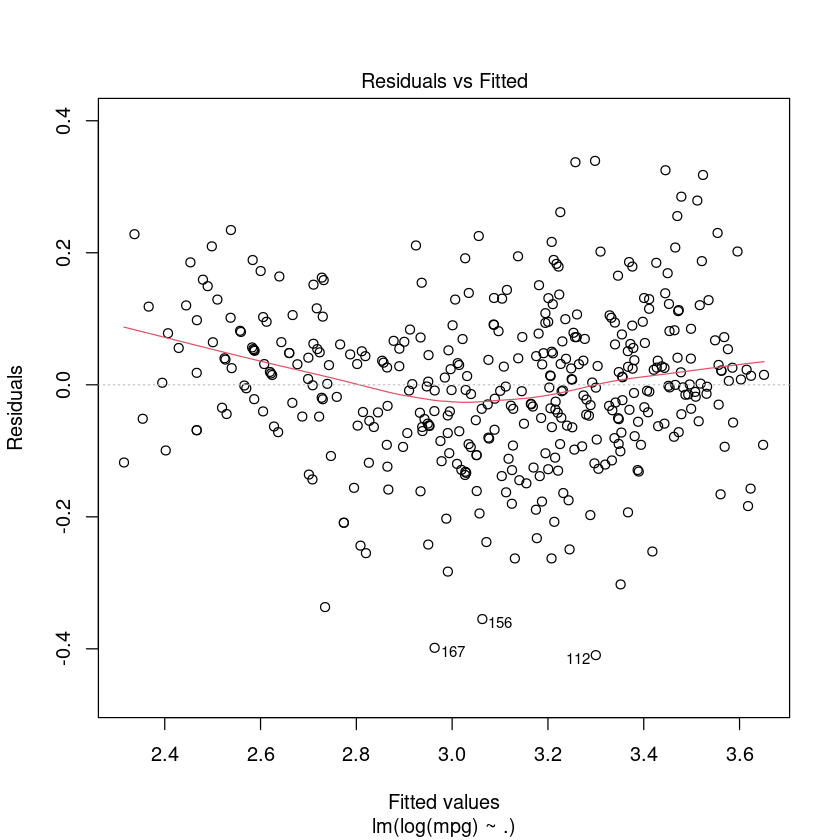

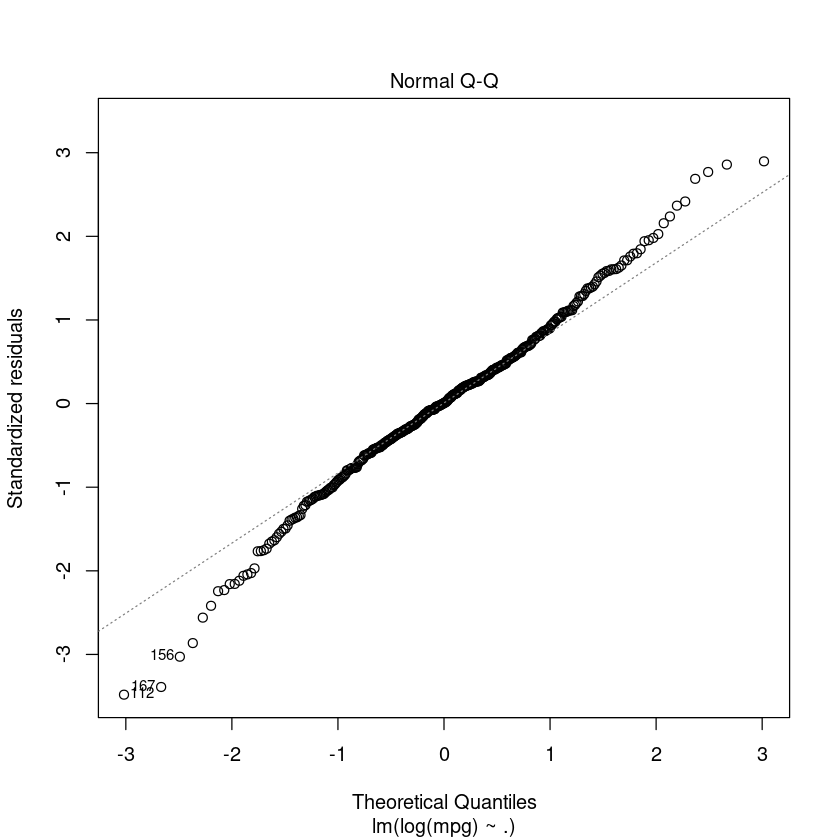

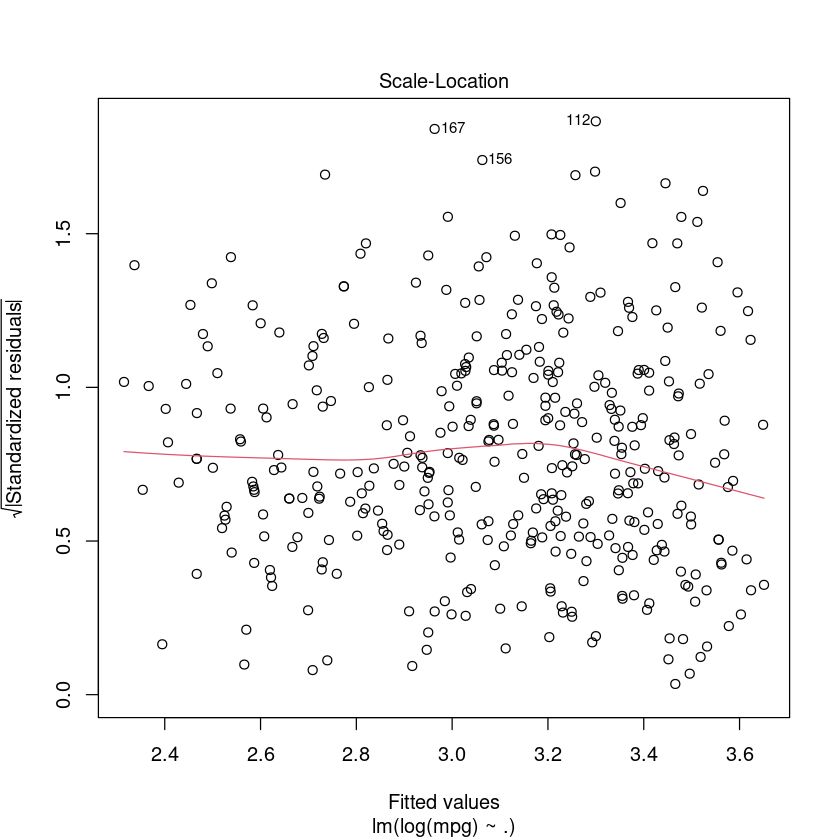

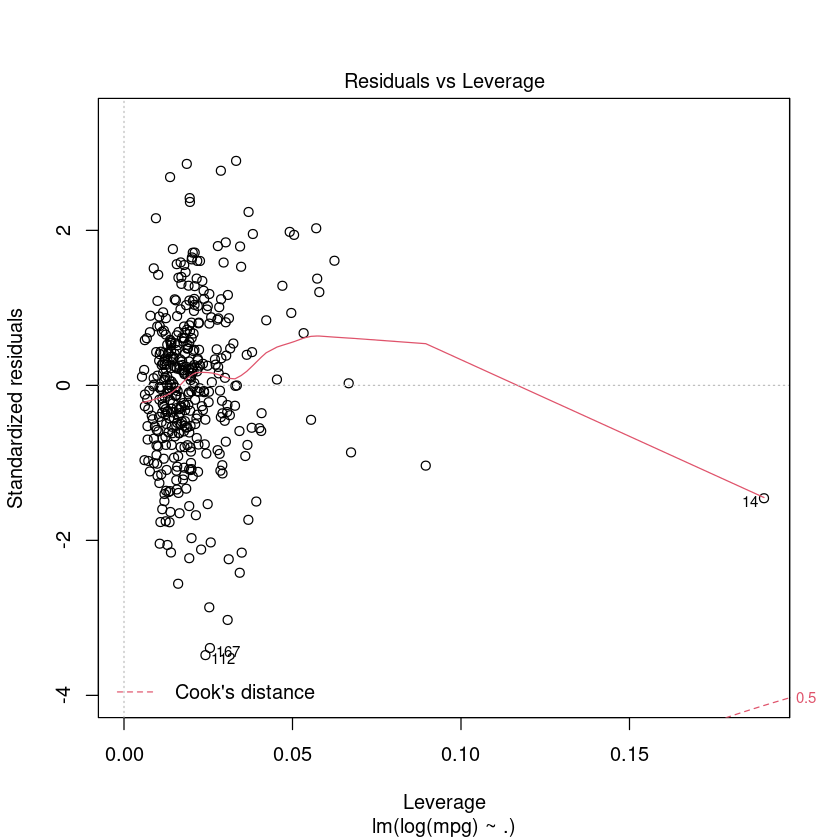

In [13]:
lm.fit = lm(log(mpg) ~ ., Auto[1:8])
plot(lm.fit)

At least for $\log$, the residuals, in residuals vs. fitted plot, are better distributed.

### Problem 13

In this exercise you will create some simulated data and will fit simple
linear regression models to it. Make sure to use `set.seed(1)` prior to
starting part **(a)** to ensure consistent results.

**(a)** Using the `rnorm()` function, create a vector, `x`, containing $100$
observations drawn from a $\text{N}(0, 1)$ distribution. This represents
a feature, $X$.

In [14]:
set.seed(1)
x = rnorm(100, 0, 1)

**(b)** Using the `rnorm()` function, create a vector, `eps`, containing $100$
observations drawn from a $\text{N}(0, 0.25)$ distribution i.e. a normal
distribution with mean zero and variance $0.25$.

In [15]:
eps = rnorm(100, 0, 0.25)

**(c)** Using `x` and `eps`, generate a vector `y` according to the model
$$Y = −1 + 0.5X + \epsilon.$$

What is the length of the vector `y`? What are the values of $\beta_0$
and $\beta_1$ in this linear model?

In [16]:
y = -1 + 0.5*x + eps
length(y)

[1] 100

**(d)** Create a scatterplot displaying the relationship between `x` and
`y`. Comment on what you observe.

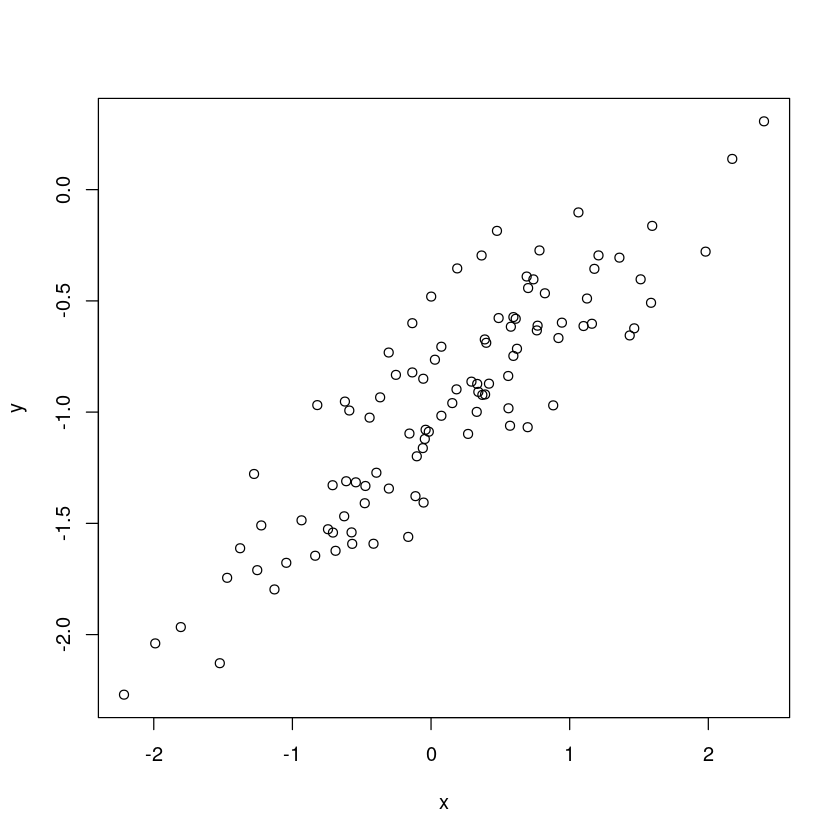

In [17]:
plot(x, y)

The relationship between `x`and `y`is basically linear.

**(e)** Fit a least squares linear model to predict `y` using `x`. Comment
on the model obtained. How do $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and
$\beta_1$?

In [18]:
lm.fit = lm(y ~ x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.46921 -0.15344 -0.03487  0.13485  0.58654 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00942    0.02425  -41.63   <2e-16 ***
x            0.49973    0.02693   18.56   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2407 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16


The model captures the linear relationship between `x` and `y`.
The coefficients are statistically significant, and the estimated
coefficients correspond to the real ones.

**(f)** Display the least squares line on the scatterplot obtained in **(d)**.
Draw the population regression line on the plot, in a different
color. Use the `legend()` command to create an appropriate legend.

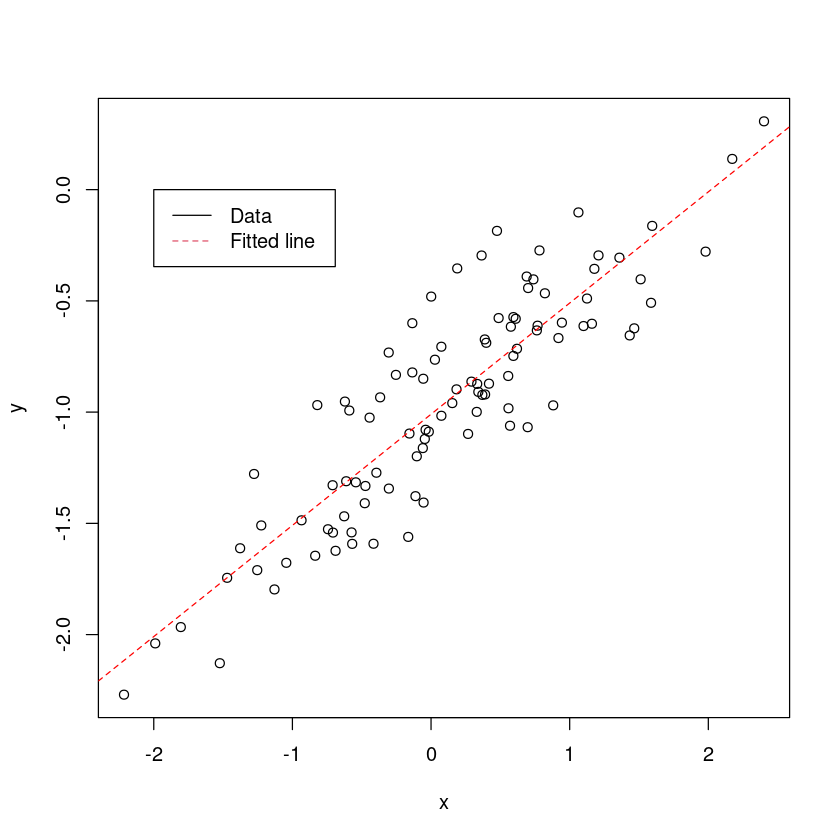

In [19]:
plot(x, y, lty = 1)
abline(lm.fit, col = "red", lty = 2)
legend(-2, 0, legend = c("Data", "Fitted line"), lty = 1:2, col = c(1, 2))

**(g)** Now fit a polynomial regression model that predicts `y` using `x`
and `x²`. Is there evidence that the quadratic term improves the
model fit? Explain your answer.

In [20]:
lm.fit = lm(y ~ x + I(x^2))
summary(lm.fit)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-0.4913 -0.1563 -0.0322  0.1451  0.5675 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98582    0.02941 -33.516   <2e-16 ***
x            0.50429    0.02700  18.680   <2e-16 ***
I(x^2)      -0.02973    0.02119  -1.403    0.164    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2395 on 97 degrees of freedom
Multiple R-squared:  0.7828,	Adjusted R-squared:  0.7784 
F-statistic: 174.8 on 2 and 97 DF,  p-value: < 2.2e-16


The quadratic term would improve the model fit if it were different from zero.
That is, if it does not improve the model, it would stay as zero, like in the model
without the quadratic term.
In our experiment, the coefficient is not statistically significant,
so we can't reject the hypothesis that the coefficient is equal to zero.
In other words, there is no evidence the quadratic term improves the model fit.

**(h)** Repeat **(a)**-**(f)** after modifying the data generation process in
such a way that there is less noise in the data. The model
should remain the same. You can do this by decreasing the
variance of the normal distribution used to generate the error term
$\epsilon$ in **(b)**. Describe your results.

In [21]:
set.seed(1)
x = rnorm(100, 0, 1)

In [22]:
eps = rnorm(100, 0, 0.125)

In [23]:
y = -1 + 0.5*x + eps

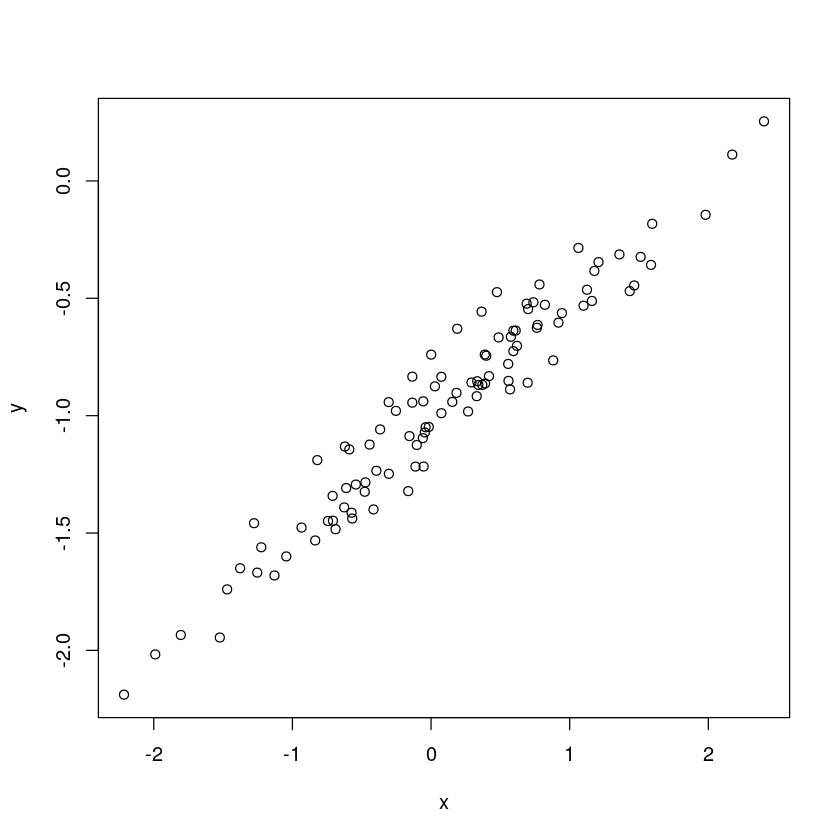

In [24]:
plot(x, y)

The relationship between `x`and `y`is basically linear.

In [25]:
lm.fit2 = lm(y ~ x)
summary(lm.fit2)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.23461 -0.07672 -0.01744  0.06742  0.29327 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.00471    0.01212  -82.87   <2e-16 ***
x            0.49987    0.01347   37.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1203 on 98 degrees of freedom
Multiple R-squared:  0.9336,	Adjusted R-squared:  0.9329 
F-statistic:  1378 on 1 and 98 DF,  p-value: < 2.2e-16


$R^2$ is improved.

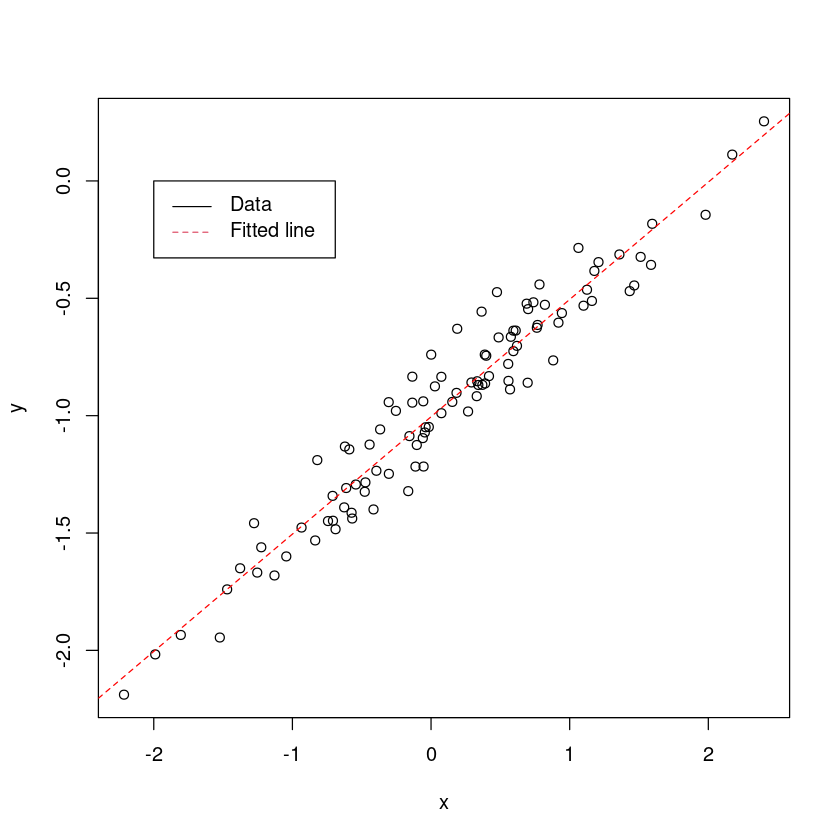

In [26]:
plot(x, y, lty = 1)
abline(lm.fit2, col = "red", lty = 2)
legend(-2, 0, legend = c("Data", "Fitted line"), lty = 1:2, col = c(1, 2))

The resulting line is better adjusted, in terms of $R^2$. We did not loose the coefficients significance, and they also estimated the real coefficients very close.

**(i)** Repeat **(a)**-**(f)** after modifying the data generation process in
such a way that there is more noise in the data. The model
should remain the same. You can do this by increasing
the variance of the normal distribution used to generate the
error term $\epsilon$ in **(b)**. Describe your results.

In [27]:
set.seed(1)
x = rnorm(100, 0, 1)

In [28]:
eps = rnorm(100, 0, 0.5)

In [29]:
y = -1 + 0.5*x + eps

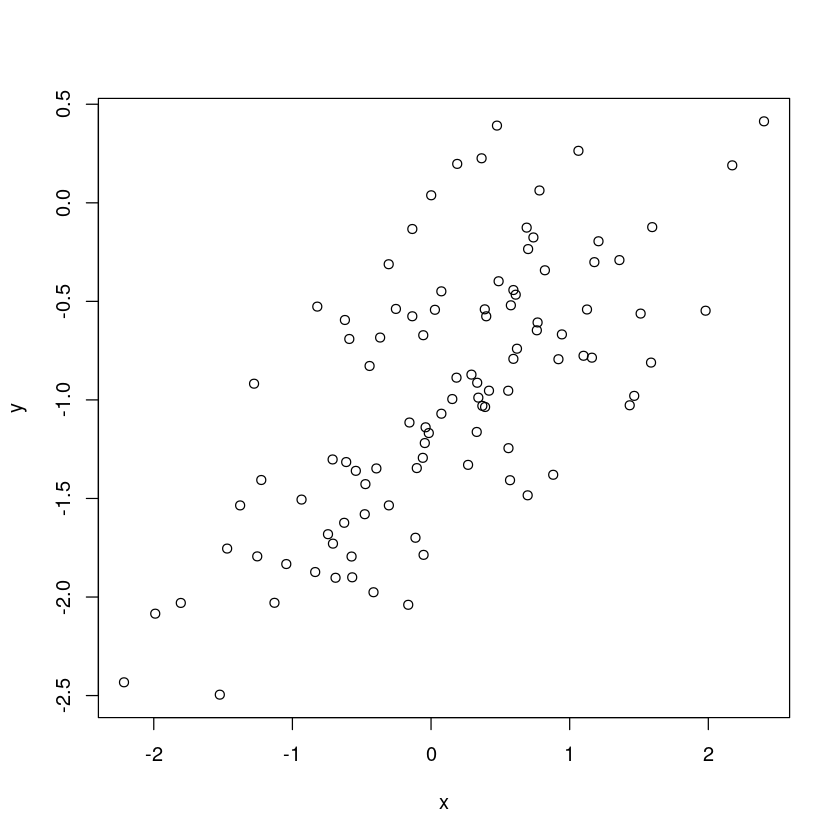

In [30]:
plot(x, y)

In [31]:
lm.fit3 = lm(y ~ x)
summary(lm.fit3)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.93842 -0.30688 -0.06975  0.26970  1.17309 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.01885    0.04849 -21.010  < 2e-16 ***
x            0.49947    0.05386   9.273 4.58e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.4814 on 98 degrees of freedom
Multiple R-squared:  0.4674,	Adjusted R-squared:  0.4619 
F-statistic: 85.99 on 1 and 98 DF,  p-value: 4.583e-15


$R^2$ is decreased.

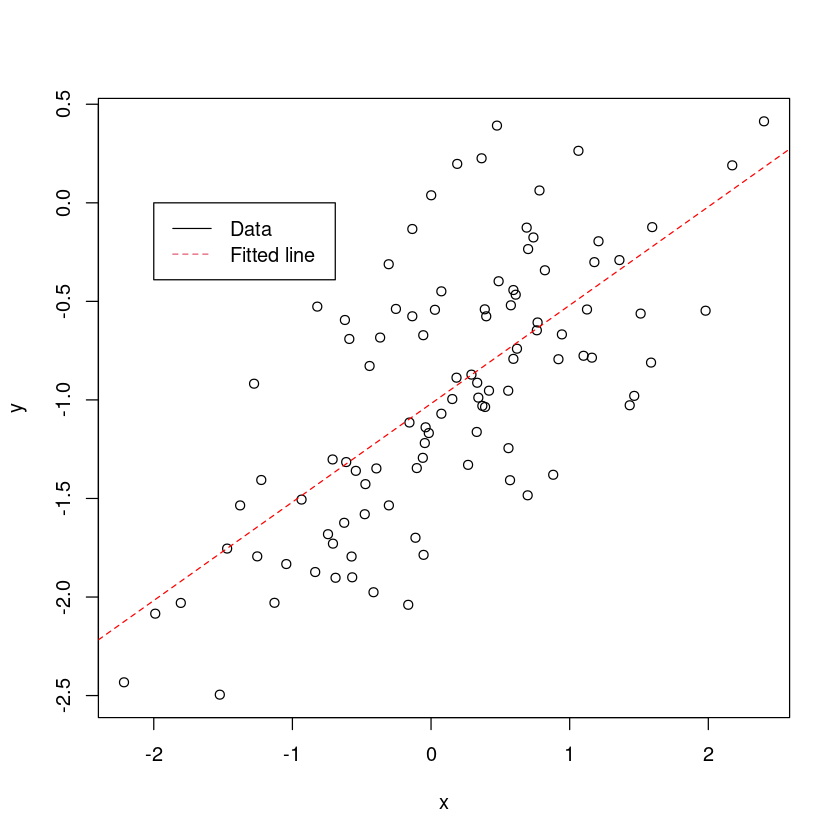

In [32]:
plot(x, y, lty = 1)
abline(lm.fit3, col = "red", lty = 2)
legend(-2, 0, legend = c("Data", "Fitted line"), lty = 1:2, col = c(1, 2))

The resulting line is less adjusted, in terms of $R^2$. However, we did not loose the coefficients significance, and they also estimated the real coefficients very close.

**(j)** What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the
original data set, the noisier data set, and the less noisy data
set? Comment on your results.

**Solution:**

For the original data set:

In [33]:
confint(lm.fit, '(Intercept)', level=0.95)
confint(lm.fit, 'x', level=0.95)

,2.5 %,97.5 %
(Intercept),-1.0442,-0.9274429


,2.5 %,97.5 %
x,0.4507113,0.5578692


Less noisy data set:

In [34]:
confint(lm.fit2, '(Intercept)', level=0.95)
confint(lm.fit2, 'x', level=0.95)

,2.5 %,97.5 %
(Intercept),-1.02877,-0.9806531


,2.5 %,97.5 %
x,0.4731449,0.5265901


Noisier data set:

In [35]:
confint(lm.fit3, '(Intercept)', level=0.95)
confint(lm.fit3, 'x', level=0.95)

,2.5 %,97.5 %
(Intercept),-1.11508,-0.9226122


,2.5 %,97.5 %
x,0.3925794,0.6063602


We see exactly what was expected: the greater the noise, the larger the interval.

## Section 4.7

### Problem 10

This question should be answered using the `Weekly` data set, which
is part of the `ISLR` package. This data is similar in nature to the
`Smarket` data from this chapter's lab, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

**(a)** Produce some numerical and graphical summaries of the `Weekly`
data. Do there appear to be any patterns?

In [36]:
head(Weekly)

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,1990,0.816,1.572,-3.936,-0.229,-3.484,0.1549760,-0.270,Down
2,1990,-0.270,0.816,1.572,-3.936,-0.229,0.1485740,-2.576,Down
3,1990,-2.576,-0.270,0.816,1.572,-3.936,0.1598375,3.514,Up
4,1990,3.514,-2.576,-0.270,0.816,1.572,0.1616300,0.712,Up
5,1990,0.712,3.514,-2.576,-0.270,0.816,0.1537280,1.178,Up
6,1990,1.178,0.712,3.514,-2.576,-0.270,0.1544440,-1.372,Down


In [37]:
summary(Weekly)

      Year           Lag1               Lag2               Lag3         
 Min.   :1990   Min.   :-18.1950   Min.   :-18.1950   Min.   :-18.1950  
 1st Qu.:1995   1st Qu.: -1.1540   1st Qu.: -1.1540   1st Qu.: -1.1580  
 Median :2000   Median :  0.2410   Median :  0.2410   Median :  0.2410  
 Mean   :2000   Mean   :  0.1506   Mean   :  0.1511   Mean   :  0.1472  
 3rd Qu.:2005   3rd Qu.:  1.4050   3rd Qu.:  1.4090   3rd Qu.:  1.4090  
 Max.   :2010   Max.   : 12.0260   Max.   : 12.0260   Max.   : 12.0260  
      Lag4               Lag5              Volume            Today         
 Min.   :-18.1950   Min.   :-18.1950   Min.   :0.08747   Min.   :-18.1950  
 1st Qu.: -1.1580   1st Qu.: -1.1660   1st Qu.:0.33202   1st Qu.: -1.1540  
 Median :  0.2380   Median :  0.2340   Median :1.00268   Median :  0.2410  
 Mean   :  0.1458   Mean   :  0.1399   Mean   :1.57462   Mean   :  0.1499  
 3rd Qu.:  1.4090   3rd Qu.:  1.4050   3rd Qu.:2.05373   3rd Qu.:  1.4050  
 Max.   : 12.0260   Max.   : 12.0

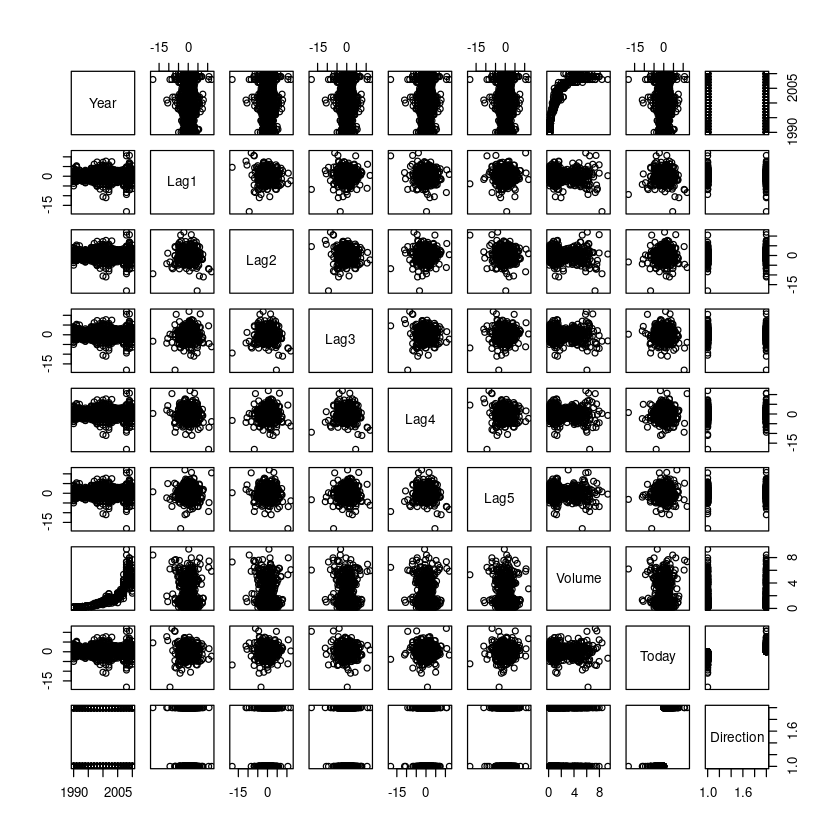

In [38]:
pairs(Weekly)

In [39]:
cor(Weekly[, 1:8])

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.00000000,-0.032289274,-0.03339001,-0.03000649,-0.031127923,-0.030519101,0.84194162,-0.032459894
Lag1,-0.03228927,1.000000000,-0.07485305,0.05863568,-0.071273876,-0.008183096,-0.06495131,-0.075031842
Lag2,-0.03339001,-0.074853051,1.00000000,-0.07572091,0.058381535,-0.072499482,-0.08551314,0.059166717
Lag3,-0.03000649,0.058635682,-0.07572091,1.00000000,-0.075395865,0.060657175,-0.06928771,-0.071243639
Lag4,-0.03112792,-0.071273876,0.05838153,-0.07539587,1.000000000,-0.075675027,-0.06107462,-0.007825873
Lag5,-0.03051910,-0.008183096,-0.07249948,0.06065717,-0.075675027,1.000000000,-0.05851741,0.011012698
Volume,0.84194162,-0.064951313,-0.08551314,-0.06928771,-0.061074617,-0.058517414,1.00000000,-0.033077783
Today,-0.03245989,-0.075031842,0.05916672,-0.07124364,-0.007825873,0.011012698,-0.03307778,1.000000000


It seems `Year` and `Volume` are very correlated.

**(b)** Use the full data set to perform a logistic regression with
`Direction` as the response and the five lag variables plus `Volume`
as predictors. Use the `summary` function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

In [40]:
lr.fit = glm(Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + Volume, Weekly, family = "binomial")
summary(lr.fit)


Call:
glm(formula = Direction ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5 + 
    Volume, family = "binomial", data = Weekly)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.6949  -1.2565   0.9913   1.0849   1.4579  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  0.26686    0.08593   3.106   0.0019 **
Lag1        -0.04127    0.02641  -1.563   0.1181   
Lag2         0.05844    0.02686   2.175   0.0296 * 
Lag3        -0.01606    0.02666  -0.602   0.5469   
Lag4        -0.02779    0.02646  -1.050   0.2937   
Lag5        -0.01447    0.02638  -0.549   0.5833   
Volume      -0.02274    0.03690  -0.616   0.5377   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1496.2  on 1088  degrees of freedom
Residual deviance: 1486.4  on 1082  degrees of freedom
AIC: 1500.4

Number of Fisher Scoring iterations: 4


Only `Lag2` appears to be statistically significant.

**(c)** Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

In [41]:
lr.probs = predict(lr.fit, type = "response")
lr.pred = rep("Down", length(lr.probs))
lr.pred[lr.probs > .5] = "Up"
table(lr.pred, Weekly$Direction)

       
lr.pred Down  Up
   Down   54  48
   Up    430 557

In [42]:
(557 + 54)/length(lr.pred)

[1] 0.5610652

It seems the model prefers to predict "Up" most of the time.

**(d)** Now fit the logistic regression model using a training data period
from 1990 to 2008, with `Lag2` as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

In [43]:
train = (Weekly$Year <= 2008)
Weekly.test = Weekly[!train, ]

In [44]:
lr.fit = glm(Direction ~ Lag2, Weekly, family = "binomial", subset = train)
lr.probs = predict(lr.fit, Weekly.test, type = "response")
lr.pred = rep("Down", length(lr.probs))
lr.pred[lr.probs > .5] = "Up"
table(lr.pred, Weekly.test$Direction)

       
lr.pred Down Up
   Down    9  5
   Up     34 56

In [45]:
(56+9)/length(lr.probs)

[1] 0.625

**(e)** Repeat **(d)** using LDA.

In [46]:
library(MASS)
lda.fit = lda(Direction ~ Lag2, Weekly, subset = train)
lda.pred = predict(lda.fit, Weekly.test)
lda.class = lda.pred$class
table(lda.class, Weekly.test$Direction)

         
lda.class Down Up
     Down    9  5
     Up     34 56

In [47]:
(56+9)/length(lda.class)

[1] 0.625

**(f)** Repeat **(d)** using QDA.

In [48]:
qda.fit = qda(Direction ~ Lag2, Weekly, subset = train)
qda.pred = predict(qda.fit, Weekly.test)
qda.class = qda.pred$class
table(qda.class, Weekly.test$Direction)

         
qda.class Down Up
     Down    0  0
     Up     43 61

In [49]:
(61+0)/length(qda.class)

[1] 0.5865385

**(g)** Repeat **(d)** using KNN with $K = 1$.

In [50]:
library(class)
train.X = matrix(Weekly$Lag2[train])
test.X = matrix(Weekly$Lag2[!train])
train.Direction = Weekly$Direction[train]

set.seed(1)
knn.pred = knn(train.X, test.X, train.Direction, k = 1)
table(knn.pred, Weekly$Direction[!train])

        
knn.pred Down Up
    Down   21 30
    Up     22 31

In [51]:
(31 + 21)/length(knn.pred)

[1] 0.5

**(h)** Which of these methods appears to provide the best results on
this data?

**Solution:** Logistic regression and LDA.

**(i)** Experiment with different combinations of predictors,
including possible transformations and interactions, for each of the
methods. Report the variables, method, and associated
confusion matrix that appears to provide the best results on the held
out data. Note that you should also experiment with values for
$K$ in the KNN classifier.

In [52]:
lr.fit = glm(Direction ~ ., Weekly, family = "binomial", subset = train)
summary(lr.fit)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Direction ~ ., family = "binomial", data = Weekly, 
    subset = train)

Deviance Residuals: 
       Min          1Q      Median          3Q         Max  
-1.883e-03  -2.000e-08   2.000e-08   2.000e-08   1.570e-03  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)
(Intercept) -3.258e+03  1.437e+06  -0.002    0.998
Year         1.632e+00  7.213e+02   0.002    0.998
Lag1        -4.830e+00  1.233e+03  -0.004    0.997
Lag2         7.448e+00  1.083e+03   0.007    0.995
Lag3         1.445e+00  9.872e+02   0.001    0.999
Lag4         7.540e-01  6.473e+02   0.001    0.999
Lag5         1.185e+01  1.320e+03   0.009    0.993
Volume      -8.664e+00  4.189e+03  -0.002    0.998
Today        8.160e+02  1.686e+04   0.048    0.961

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1.3547e+03  on 984  degrees of freedom
Residual deviance: 9.2831e-06  on 976  degrees of freedom
AIC: 18

Number of Fisher Scoring iterations: 25


In [53]:
lr.probs = predict(lr.fit, Weekly.test, type = "response")
lr.pred = rep("Down", length(lr.probs))
lr.pred[lr.probs > .5] = "Up"
table(lr.pred, Weekly.test$Direction)

       
lr.pred Down Up
   Down   43  0
   Up      0 61

In [54]:
(43 + 61)/length(lr.probs)

[1] 1

### Problem 11

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the `Auto` data set.

**(a)** Create a binary variable, `mpg01`, that contains a $1$ if `mpg` contains
a value above its median, and a $0$ if `mpg` contains a value below
its median. You can compute the median using the `median()`
function. Note you may find it helpful to use the `data.frame()`
function to create a single data set containing both `mpg01` and
the other `Auto` variables.

In [55]:
mpg01 = Auto$mpg > median(Auto$mpg)
Auto.new = Auto
Auto.new$mpg01 = mpg01

**(b)** Explore the data graphically in order to investigate the
association between `mpg01` and the other features. Which of the other
features seem most likely to be useful in predicting `mpg01`?
Scatterplots and boxplots may be useful tools to answer this
question. Describe your findings.

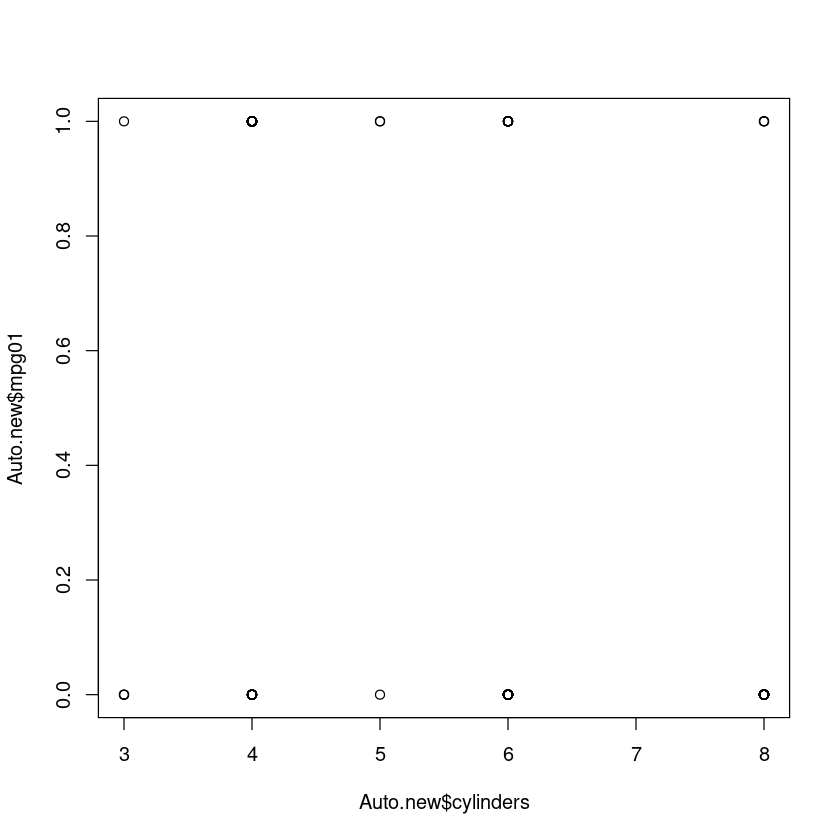

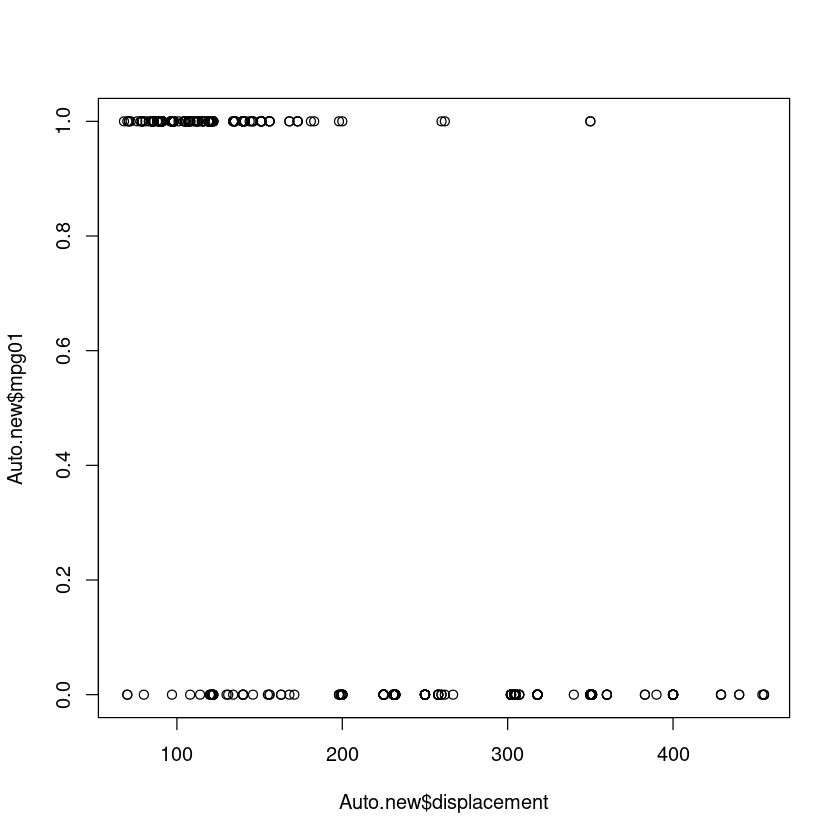

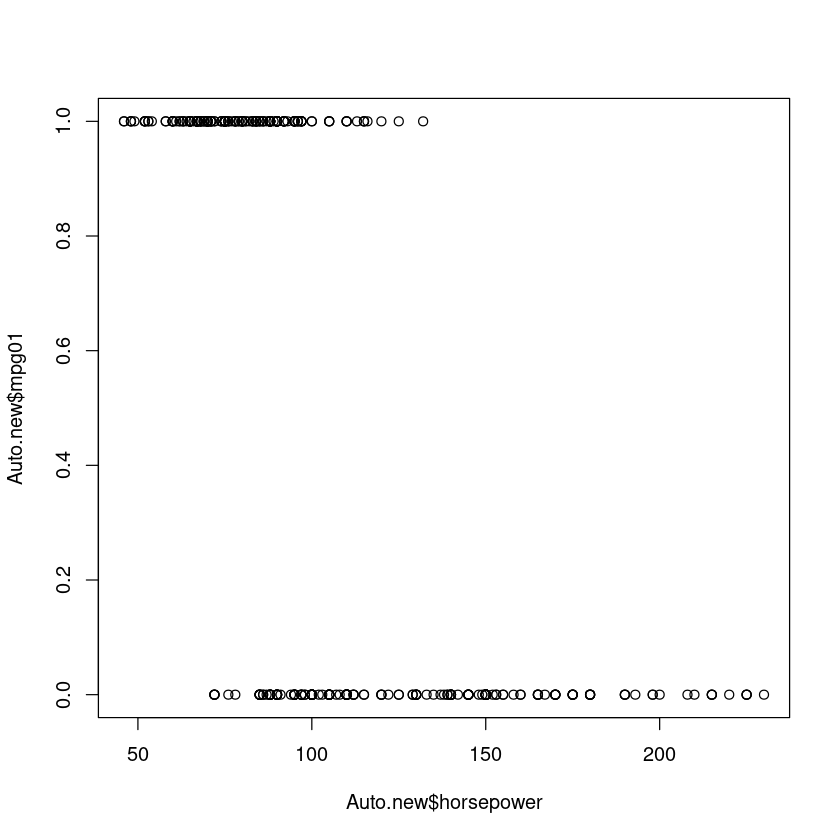

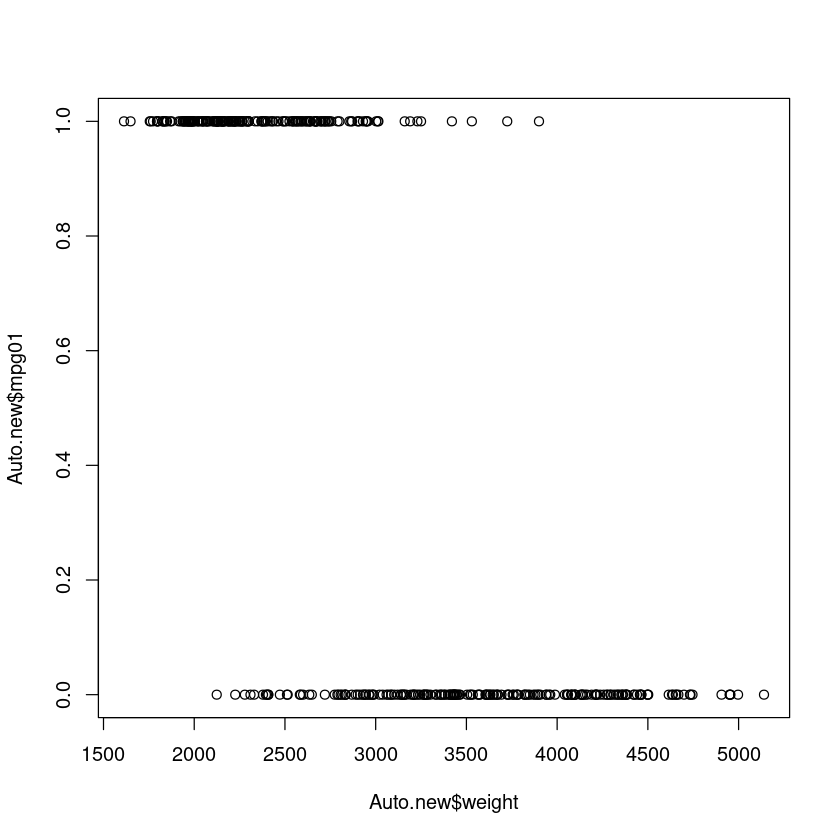

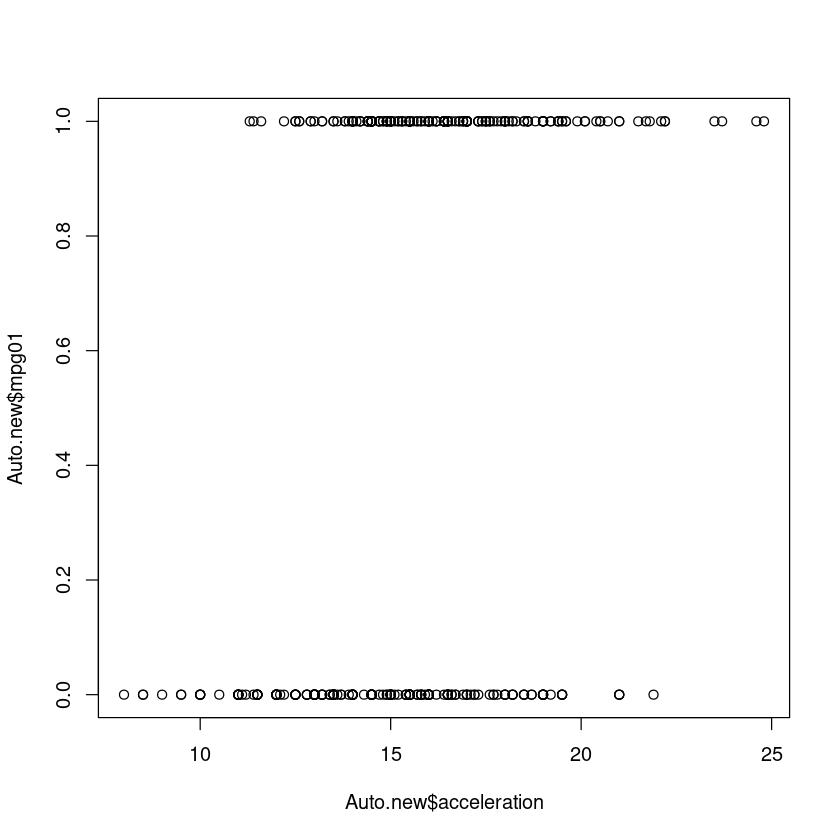

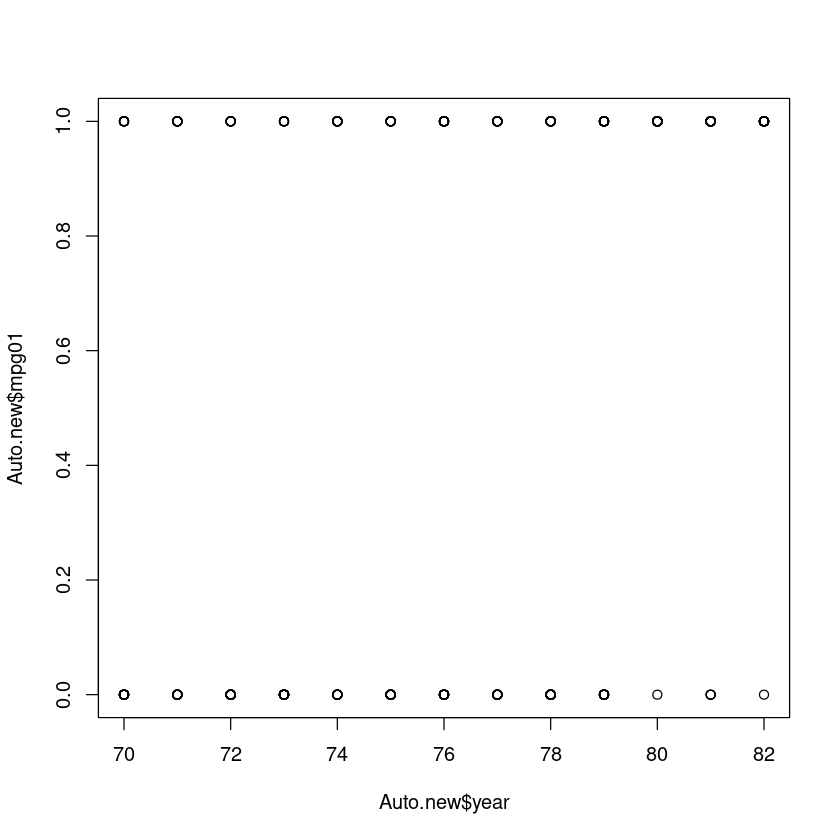

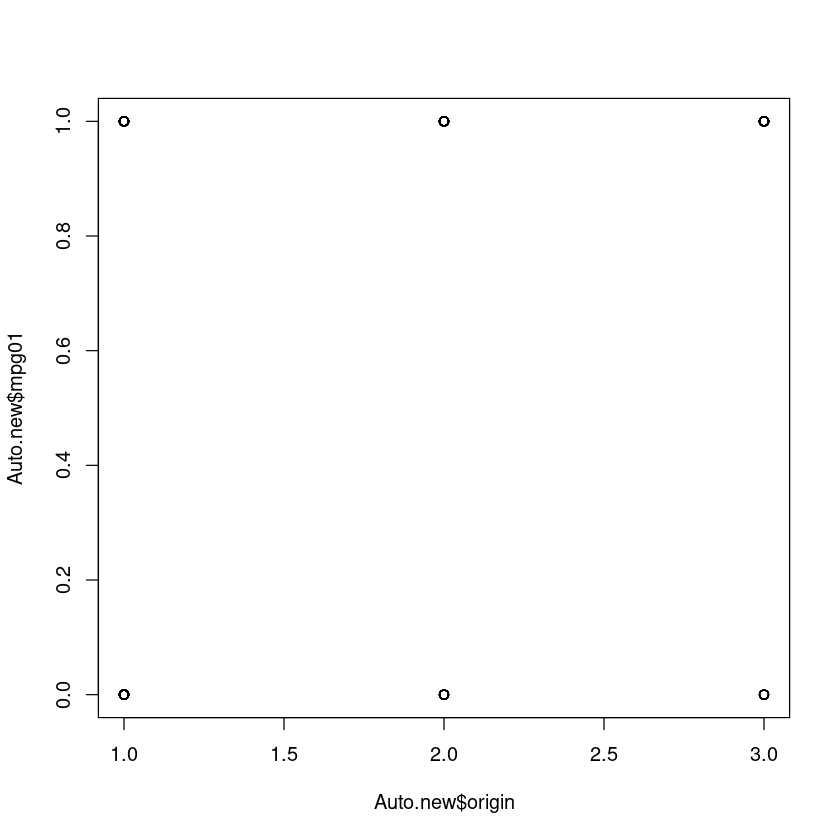

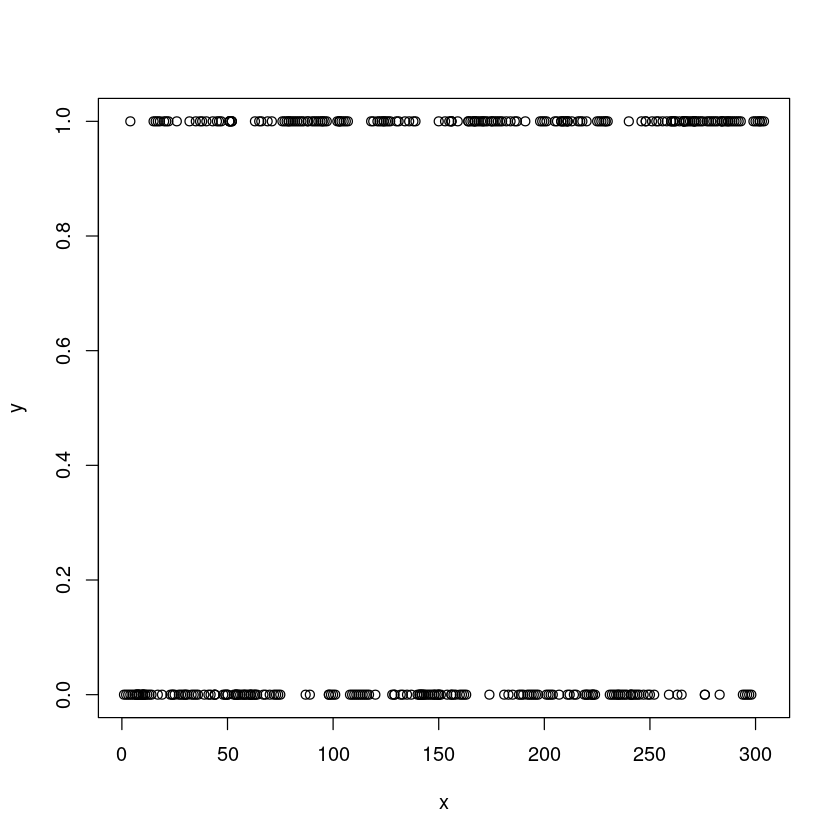

In [56]:
plot(Auto.new$cylinders, Auto.new$mpg01)
plot(Auto.new$displacement, Auto.new$mpg01)
plot(Auto.new$horsepower, Auto.new$mpg01)
plot(Auto.new$weight, Auto.new$mpg01)
plot(Auto.new$acceleration, Auto.new$mpg01)
plot(Auto.new$year, Auto.new$mpg01)
plot(Auto.new$origin, Auto.new$mpg01)
plot(Auto.new$name, Auto.new$mpg01)

`displacement`, `horsepower`, `weight` and `acceleration` seem to be useful.

**(c)** Split the data into a training set and a test set.

In [57]:
train = Auto.new$year < 80
Auto.new.test = Auto.new[!train, ]

**(d)** Perform LDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
**(b)**. What is the test error of the model obtained?

In [58]:
lda.fit = lda(mpg01 ~ displacement + horsepower + weight + acceleration, Auto.new, subset = train)
lda.pred = predict(lda.fit, Auto.new.test)
lda.class = lda.pred$class
table(lda.class, Auto.new.test$mpg01)

         
lda.class FALSE TRUE
    FALSE     5    9
    TRUE      0   71

In [59]:
(71+5)/length(lda.class)

[1] 0.8941176

**(e)** Perform QDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
**(b)**. What is the test error of the model obtained?

In [60]:
qda.fit = qda(mpg01 ~ displacement + horsepower + weight + acceleration, Auto.new, subset = train)
qda.pred = predict(qda.fit, Auto.new.test)
qda.class = qda.pred$class
table(qda.class, Auto.new.test$mpg01)

         
qda.class FALSE TRUE
    FALSE     5    9
    TRUE      0   71

In [61]:
(71+5)/length(qda.class)

[1] 0.8941176

**(f)** Perform logistic regression on the training data in order to
predict `mpg01` using the variables that seemed most associated with
`mpg01` in **(b)**. What is the test error of the model obtained?

In [62]:
lr.fit = glm(mpg01 ~ displacement + horsepower + weight + acceleration, Auto.new, family = "binomial", subset = train)
lr.probs = predict(lr.fit, Auto.new.test, type = "response")
lr.pred = rep(0, length(lr.probs))
lr.pred[lr.probs > .5] = 1
table(lr.pred, Auto.new.test$mpg01)

       
lr.pred FALSE TRUE
      0     5   16
      1     0   64

In [63]:
(64 + 5)/length(lr.probs)

[1] 0.8117647

**(g)** Perform KNN on the training data, with several values of $K$, in
order to predict `mpg01`. Use only the variables that seemed most
associated with `mpg01` in **(b)**. What test errors do you obtain?
Which value of $K$ seems to perform the best on this data set?

In [64]:
for (k in 1:15) {
    train.X = cbind(Auto.new$displacement, Auto.new$horsepower, Auto.new$weight, Auto.new$acceleration)[train, ]
    test.X = cbind(Auto.new$displacement, Auto.new$horsepower, Auto.new$weight, Auto.new$acceleration)[!train, ]
    train.mpg01 = Auto.new$mpg01[train]

    set.seed(1)
    knn.pred = knn(train.X, test.X, train.mpg01, k = k)
    table = table(knn.pred, Auto.new$mpg01[!train])
    accuracy = (table[1, 1] + table [2, 2])/length(knn.pred)
    print(c(k, accuracy))
}

[1] 1.0 0.8
[1] 2.0000000 0.7647059
[1] 3.0000000 0.7411765
[1] 4.0000000 0.7647059
[1] 5.0000000 0.7764706
[1] 6.0000000 0.7882353
[1] 7.0000000 0.7764706
[1] 8.0000000 0.7647059
[1] 9.0000000 0.7647059
[1] 10.0000000  0.7764706
[1] 11.0000000  0.7882353
[1] 12.0000000  0.7882353
[1] 13.0  0.8
[1] 14.0000000  0.7647059
[1] 15.0  0.8


## Reference

```bibtex
@book{james2013introduction,
  title={An Introduction to Statistical Learning: with Applications in R},
  author={James, G. and Witten, D. and Hastie, T. and Tibshirani, R.},
  isbn={9781461471387},
  lccn={13936251},
  series={Springer Texts in Statistics},
  url={https://books.google.com.br/books?id=qcI\_AAAAQBAJ},
  year={2013},
  publisher={Springer New York}
}
```